# Sentiment Analysis - Naive Bayes (Multinomial)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from nltk.corpus import stopwords
import nltk
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("kaggle/input/final-data-csv/final_data.csv")

In [ ]:
df.head()

,Unnamed: 0,Id,Title,User_id,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,publisher,publishedDate,categories,ratingsCount,compound,Sentiment
0,0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels'],2.0,0.9408,positive
1,1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0,0.9876,positive
2,2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0,0.9932,positive
3,3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0,0.9782,positive
4,4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],2.0,0.9604,positive


### Data Cleaning

- Filling all the missing values in 'review/text' column with the placeholder string "No Review Text".
- Filling all the missing values in the 'Sentiment' column with the mode of the column

In [ ]:
df['review/text'].fillna("No review text", inplace=True)

mode = df['Sentiment'].mode()[0]
df['Sentiment'].fillna(mode, inplace=True)

### Train-Test Split

#### Choosing an 80:20 split for the development and the test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review/text'],
    df['Sentiment'],
    test_size=0.2,
    random_state=42,
    stratify=df['Sentiment'])

### Text Vectorization and Stopwords Removal

- Vectorizing the textual data using TFIDF Vectorizer
- Removing the stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=1000)

### Grid Search

- Using a log range of alphas from 0.01 to 1000
- Employing a 5-Fold Cross Validation. Choosing 5-Fold over 10-Fold due to the enormous size of the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', MultinomialNB())
])

parameters = {
    'classifier__alpha': [0.01, 0.1, 1, 10, 100, 1000],
}

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

In [ ]:
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', verbose=2,
                           n_jobs=2)

In [ ]:
%%time
%%capture v
grid_search.fit(X_train, y_train_enc)

In [ ]:
v.show()

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=1000,
                                                        stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('classifier', MultinomialNB())]),
             n_jobs=2,
             param_grid={'classifier__alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=2)

In [ ]:
import pickle
pickle.dump(grid_search, open('nb.pickle', 'wb'))

### Evaluating the Best Model from Grid Search

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test_enc, y_pred)
report = classification_report(y_test_enc, y_pred)

In [ ]:
print("Accuracy on Test Set: ", accuracy)
print("Classification Report on Test Set:")
print(report)

Accuracy on Test Set:  0.6627324632283574
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.37      0.64      0.46     71182
           1       0.07      0.51      0.12      9709
           2       0.94      0.67      0.78    406713

    accuracy                           0.66    487604
   macro avg       0.46      0.61      0.46    487604
weighted avg       0.84      0.66      0.72    487604



The best model has an accuracy of 66%. Analyzing the performance for each of the 3 classes, the positive class achieved the highest scores for all precision, recall and f1. On the other hand, the corresponding scores for negative and neutral classes are poor. This is again highlighting the imabalnce within the dataset.

## TPR VS FPR Curve

#### ROC Curve is created for Binary Classification problems. However, we know that there are three sentiment labels: Negative, Neutral and Positive. Therefore, this problem is a multi-class classification problem. Therefore, converting this multi-class classification problem into a One vs Rest (OvR) Binary Classification problem, and we are plotting the ROC curve for the three cases.

In [ ]:
y_pred_prob = best_model.predict_proba(X_test)[:,2]

In [ ]:
import numpy as np
classes = np.unique(y_test)
print(classes)

['negative' 'neutral' 'positive']


In [ ]:
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes = classes)
print(y_test_binarized)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [1 0 0]]


In [ ]:
# computing the ROC curve and the AUC for each of the three classes

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = best_model.predict_proba(X_test)
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

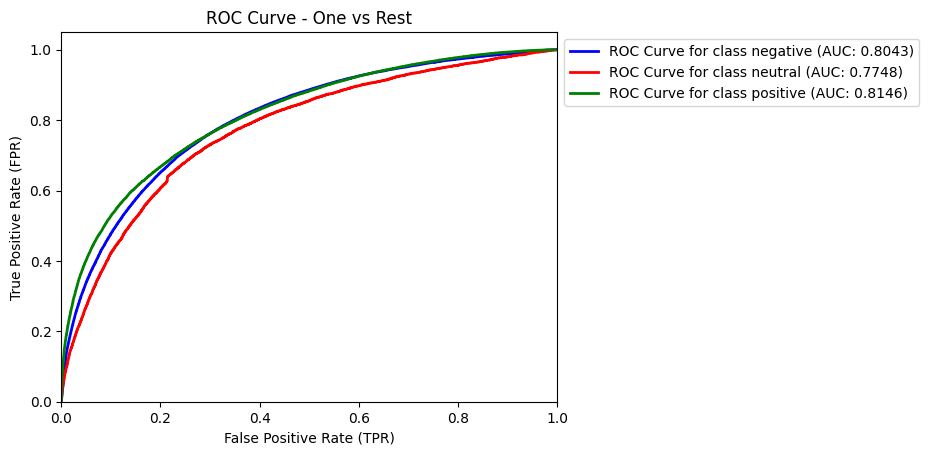

In [ ]:
# color context:
# blue - class 0 - negative sentiment
# red - class 1 - neutral sentiment
# green - class 2 - positive sentiment

import matplotlib.pyplot as plt
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw = 2, label = 'ROC Curve for class {0} (AUC: {1:0.4f})'.format(classes[i], roc_auc[i]))

#plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (TPR)')
plt.ylabel('True Positive Rate (FPR)')
plt.title('ROC Curve - One vs Rest')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Here we see that the AUC score is relatively close across the 3 classes, showing the model's consistency in generalizing on the patterns. However, this still shows the model is not performing as well in learning the neutral class.